###
1. Data Ingesition
2. Eda of the data
3. processing of the data
4. model building
5. model evalution

## Data Ingestion
###### 
1. import the required libraries
2. load the data
3. load the time series datat into the dataframe
4. set the datetime column as the index of the dataframe
5. check the datatype of the index and convert it to datetime if necessary

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [112]:
data = pd.read_csv("TSLA.CSV")

In [113]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.80,5.00,3.51,4.78,93831500,0,0.0
1,2010-06-30,5.16,6.08,4.66,4.77,85935500,0,0.0
2,2010-07-01,5.00,5.18,4.05,4.39,41094000,0,0.0
3,2010-07-02,4.60,4.62,3.74,3.84,25699000,0,0.0
4,2010-07-06,4.00,4.00,3.17,3.22,34334500,0,0.0


In [114]:
#univarient analysis
stock_data = data[["Date","Close"]]

In [115]:
stock_data.head()

,Date,Close
0,2010-06-29,4.78
1,2010-06-30,4.77
2,2010-07-01,4.39
3,2010-07-02,3.84
4,2010-07-06,3.22


In [116]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2657 non-null   object 
 1   Close   2657 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.6+ KB


In [117]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

C:\Users\Karan Sharma\AppData\Local\Temp\ipykernel_4248\3739671253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [118]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2657 non-null   datetime64[ns]
 1   Close   2657 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.6 KB


In [119]:
stock_data = stock_data.set_index("Date")

In [120]:
stock_data.head()

,Close
Date,
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22


## EDA of the Data
######
1. summary statistics
2. visualize the time series
3. stationarity check
4. check for autocorrelation
5. outlier detection
6. check for autocorrelation

In [121]:
stock_data.describe()

,Close
count,2657.000000
mean,63.668152
std,104.061653
min,3.160000
25%,7.500000
50%,44.510000
75%,61.000000
max,880.020000


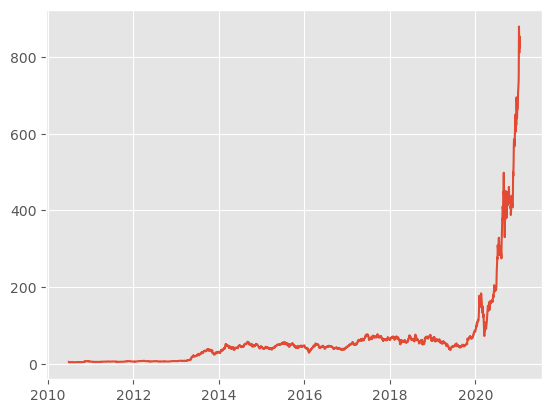

In [122]:
plt.plot(stock_data.Close)

(array([2403.,   95.,   23.,   31.,   50.,   19.,   10.,   15.,    4.,
           7.]),
 array([  3.16 ,  90.846, 178.532, 266.218, 353.904, 441.59 , 529.276,
        616.962, 704.648, 792.334, 880.02 ]),
 <BarContainer object of 10 artists>)

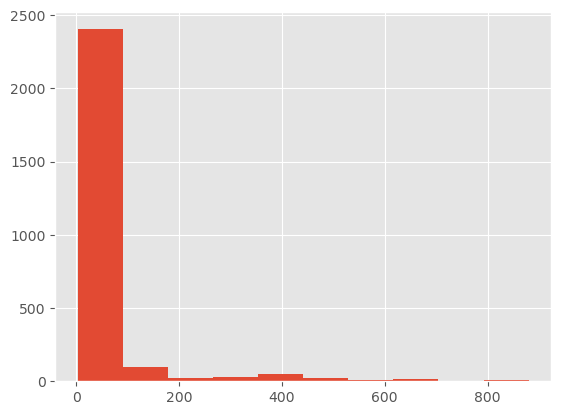

In [123]:
plt.hist(stock_data.Close)

C:\Users\Karan Sharma\AppData\Local\Temp\ipykernel_4248\1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<Axes: xlabel='Close', ylabel='Density'>

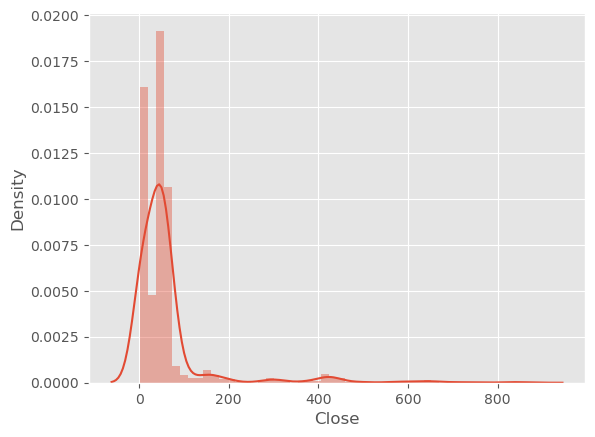

In [124]:
import seaborn as sns
sns.distplot(stock_data.Close)

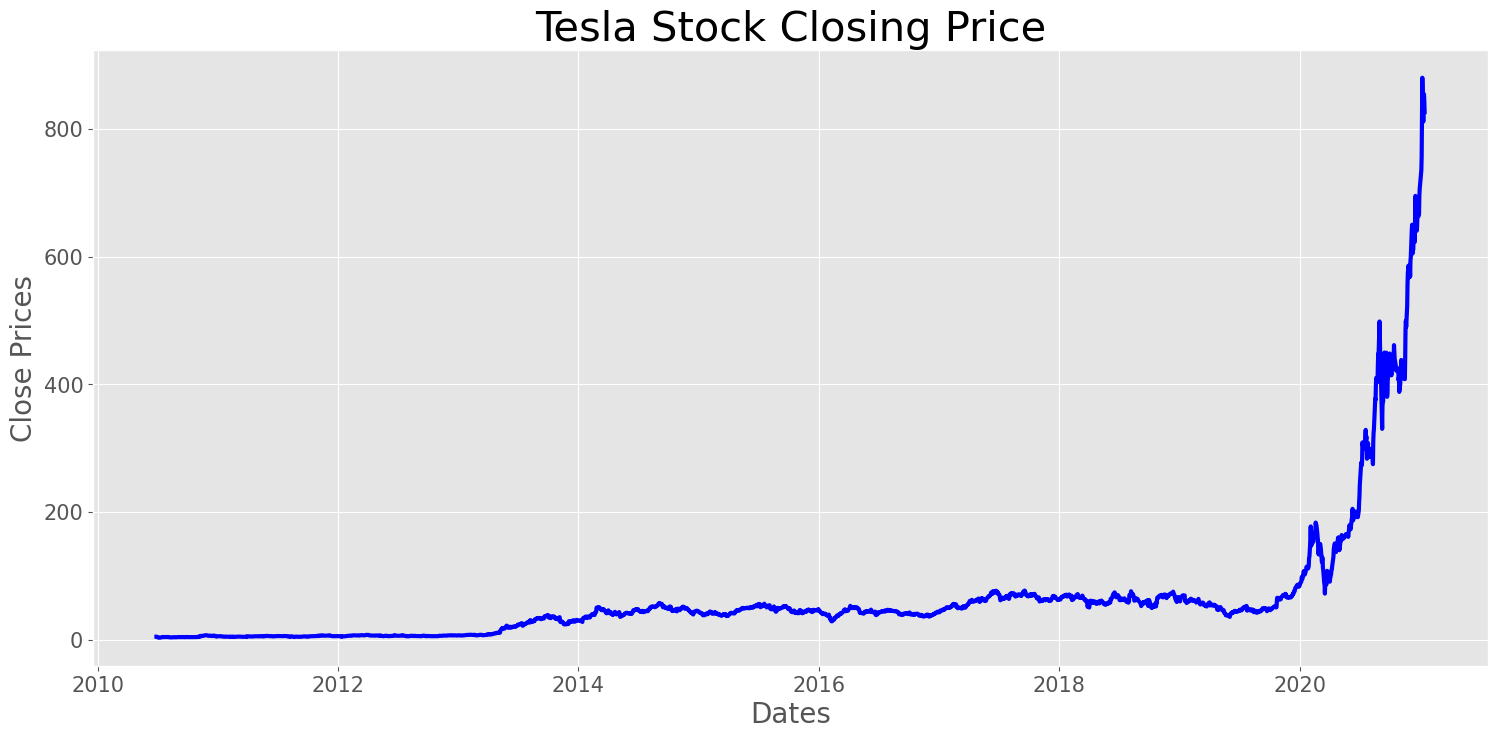

In [125]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'],linewidth = 3 ,color = 'blue')
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

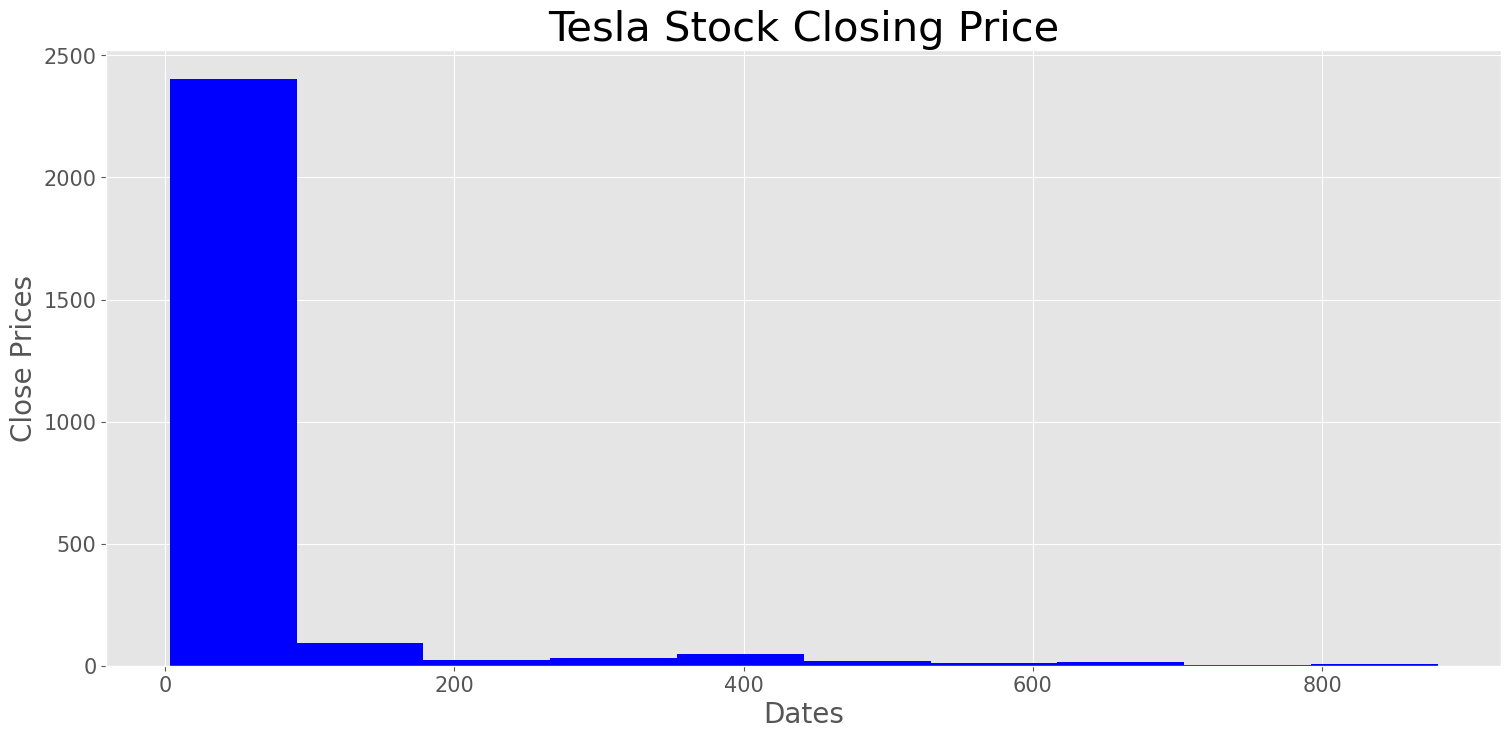

In [126]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'],linewidth = 3 ,color = 'blue')
plt.title('Tesla Stock Closing Price',fontsize = 30)
plt.show()

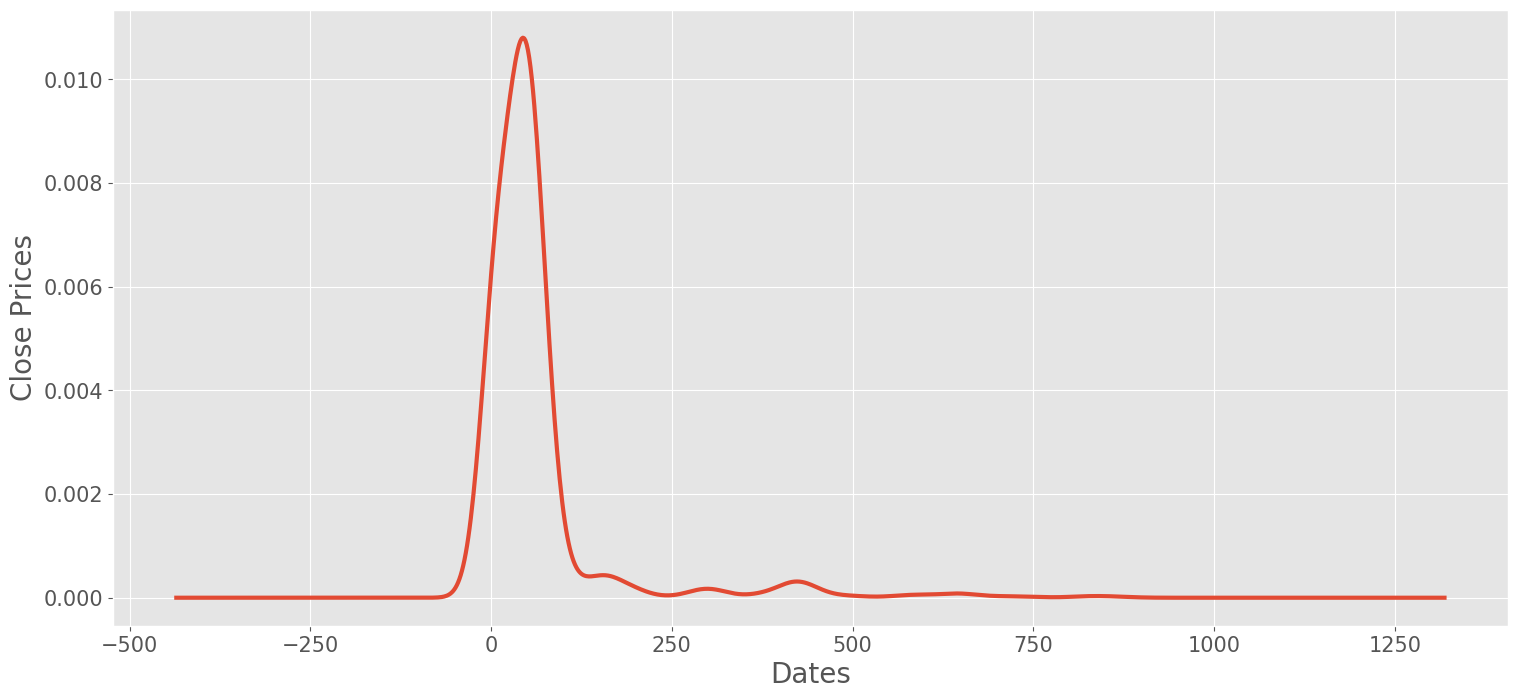

In [127]:
df_close = stock_data['Close']
df_close.plot(kind = 'kde',figsize = (18,8),linewidth=3)
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [128]:
rolmean = stock_data["Close"].rolling(365).mean()

In [129]:
rolstd = stock_data["Close"].rolling(12).std()

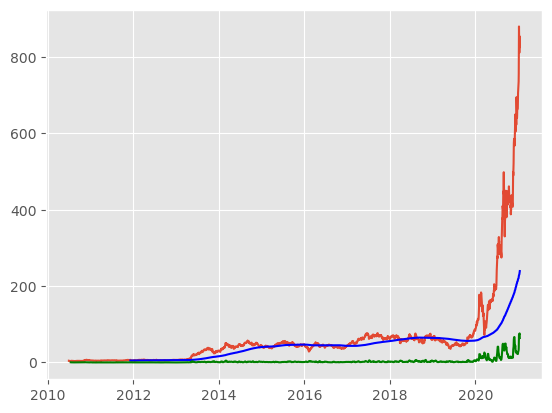

In [130]:
plt.plot(stock_data.Close)
plt.plot(rolmean ,c ='b')
plt.plot(rolstd , c = 'g')

In [131]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [132]:
pd.Series(adft[0:4],index = ['test stats','p value','lag','data points'])

test stats        9.644839
p value           1.000000
lag              25.000000
data points    2631.000000
dtype: float64

####
null hyphothesis = non - stationary data

p value = 0.599876
p<0.05
reject null hyphothesis

p > 0.05 
accept null hyphothesis

In [133]:
# TEST for stationary 

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(300).mean()
    rolstd = timeseries.rolling(300).std()
    #plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries,color = 'blue',label = 'Original',linewidth=3)
    plt.plot(rolmean,color='red',label = 'Rolling Mean',linewidth=3)
    plt.plot(rolstd,color = 'black',label = "Rolling Std",linewidth = 4)
    plt.legend(loc='best',fontsize=20,shadow = True,facecolor='lightpink',edgecolor='k')
    plt.title("Rolling Mean and Standard Deviation ",fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Result of dickey fuller test")
    adft = adfuller(timeseries,autolag = 'AIC')
    output = pd.Series(adft[0:4],index = ['Test Statistics','p-value','lag','data points'])
    for key,values in adft[4].items():
        output['critical value(%s)'%key] = values
    print(output)

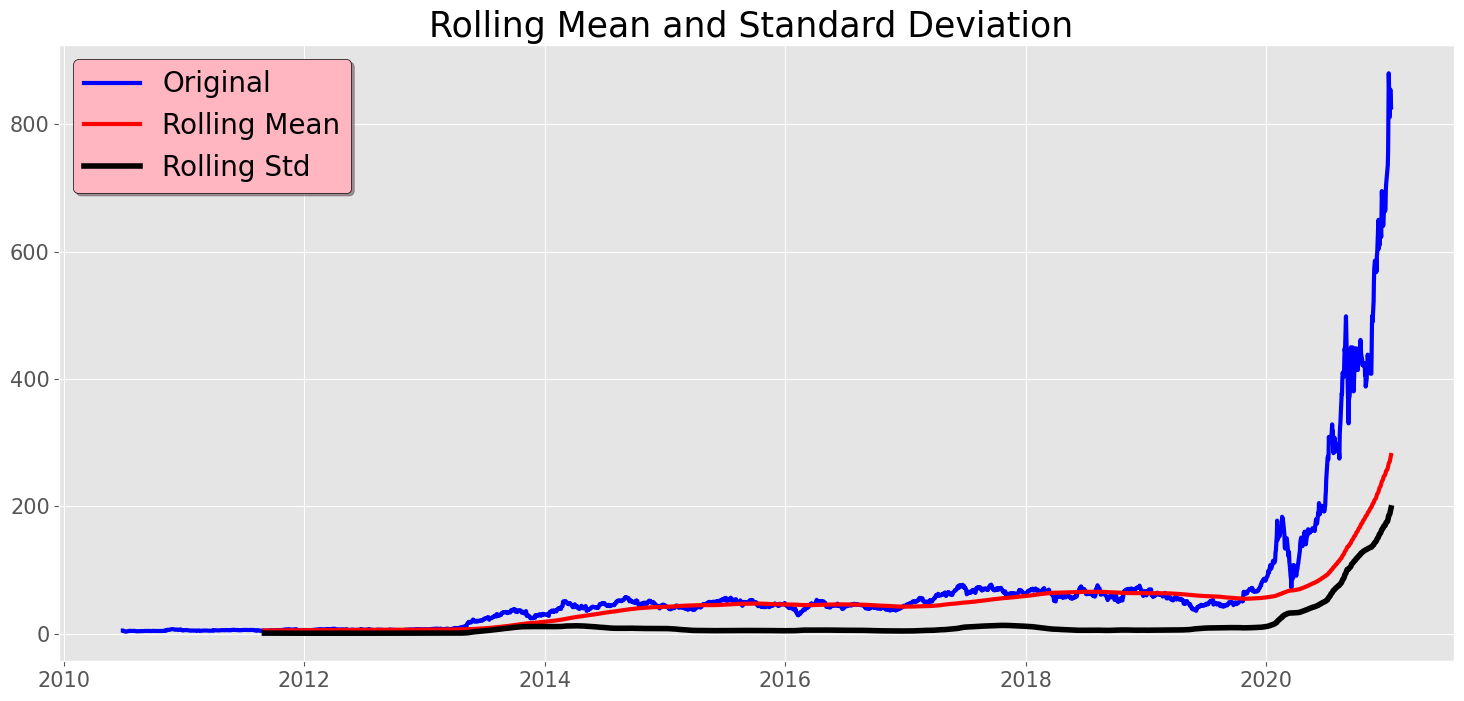

Result of dickey fuller test
Test Statistics           9.644839
p-value                   1.000000
lag                      25.000000
data points            2631.000000
critical value(1%)       -3.432838
critical value(5%)       -2.862639
critical value(10%)      -2.567355
dtype: float64


In [134]:
test_stationarity(stock_data)

<Axes: >

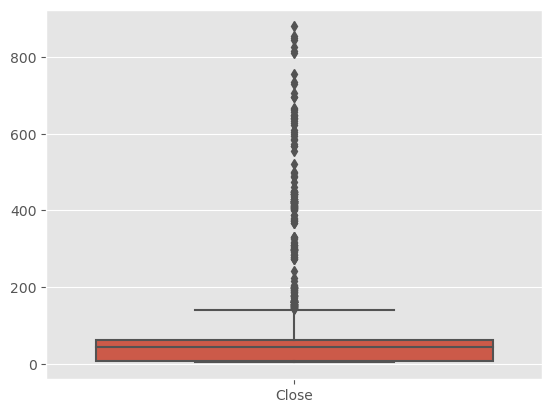

In [135]:
sns.boxplot(stock_data)

In [136]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]],period =12)

In [137]:
result

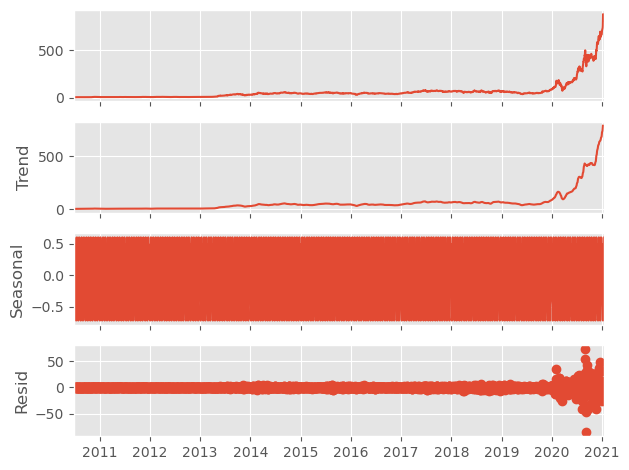

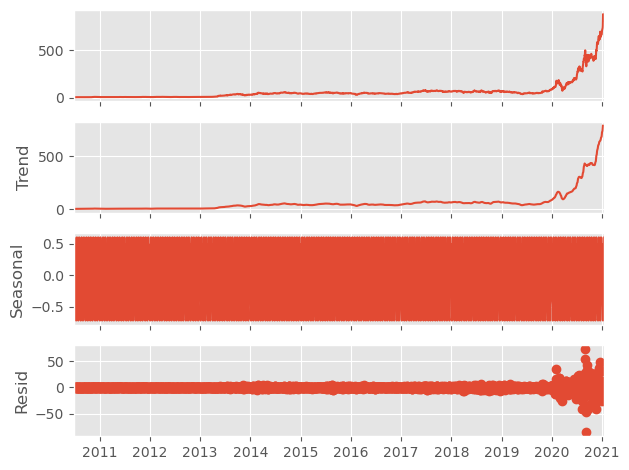

In [138]:
result.plot()

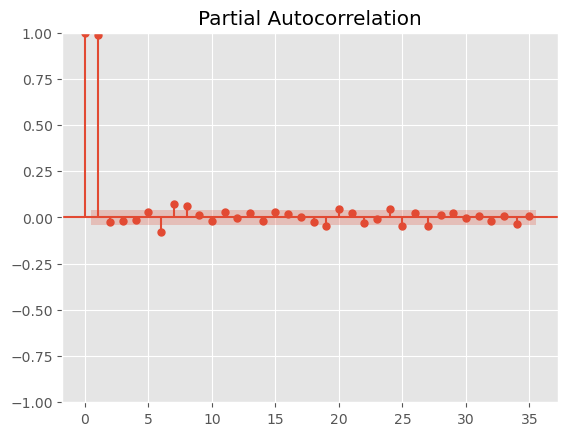

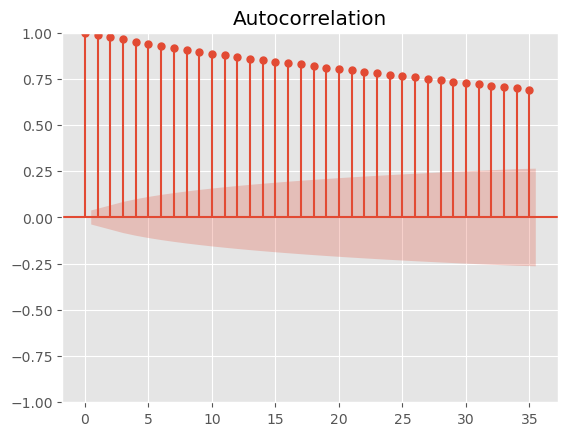

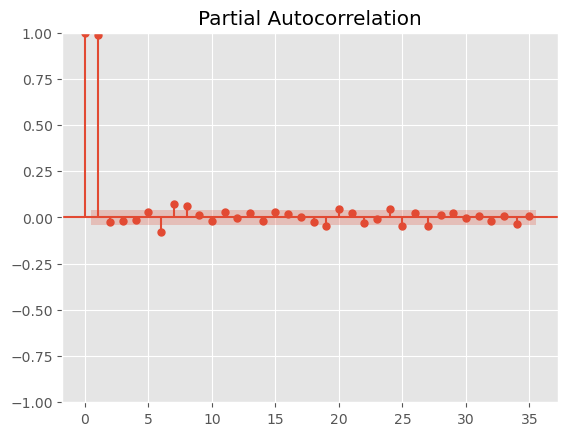

In [139]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

### Preprocessing of the Data
#####
1. fill the miss(here not required)
2. convert data into the stationary time series
3. if necessary then normalize the data(here not required)
4. split the data into train and test
5. clean the data by removing the outlier(here not required)

In [140]:
df_close = stock_data['Close']

In [141]:
df_close

Date
2010-06-29      4.78
2010-06-30      4.77
2010-07-01      4.39
2010-07-02      3.84
2010-07-06      3.22
               ...  
2021-01-11    811.19
2021-01-12    849.44
2021-01-13    854.41
2021-01-14    845.00
2021-01-15    826.16
Name: Close, Length: 2657, dtype: float64

In [142]:
df_close = df_close.diff(2)

In [143]:
df_close = df_close.dropna()

In [144]:
df_close

Date
2010-07-01    -0.39
2010-07-02    -0.93
2010-07-06    -1.17
2010-07-07    -0.68
2010-07-08     0.27
              ...  
2021-01-11    -4.85
2021-01-12   -30.58
2021-01-13    43.22
2021-01-14    -4.44
2021-01-15   -28.25
Name: Close, Length: 2655, dtype: float64

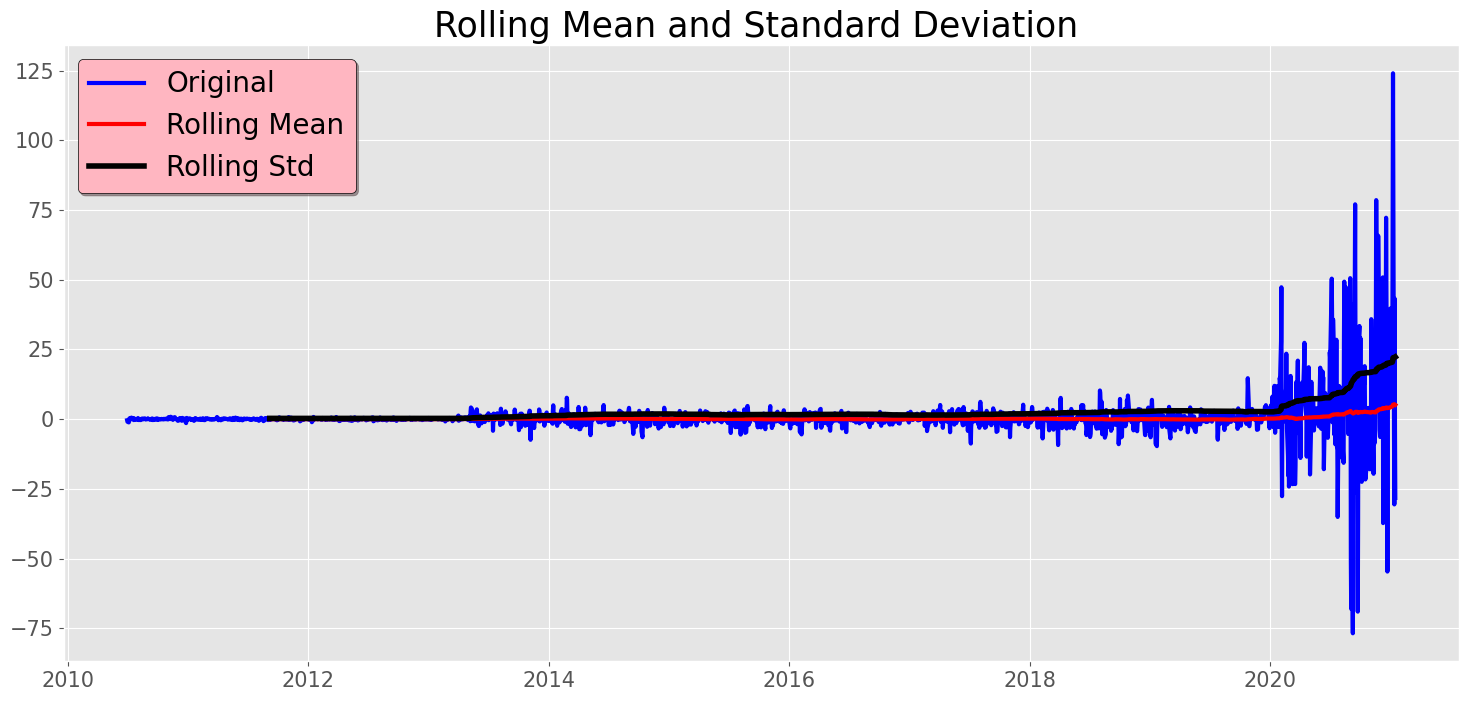

Result of dickey fuller test
Test Statistics          -3.677329
p-value                   0.004444
lag                      28.000000
data points            2626.000000
critical value(1%)       -3.432843
critical value(5%)       -2.862641
critical value(10%)      -2.567356
dtype: float64


In [145]:
test_stationarity(df_close)